In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

# New Section

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


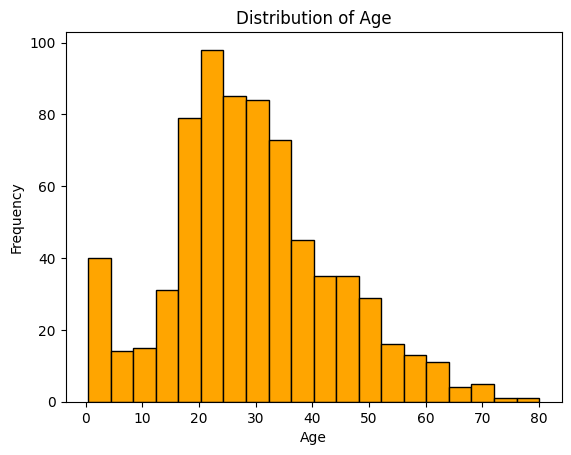

In [ ]:
plt.hist(df['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

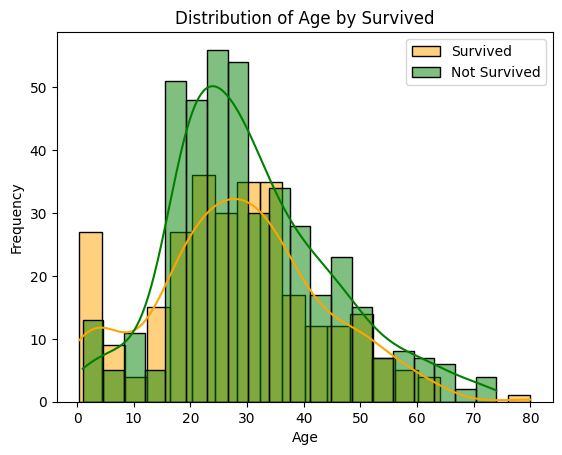

In [ ]:
survived = df[df['Survived'] == 1]['Age'].dropna()
not_survived = df[df['Survived'] == 0]['Age'].dropna()
sns.histplot(survived, bins=20, color='orange', kde=True, label='Survived')
sns.histplot(not_survived, bins=20, color='green', kde=True, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survived')
plt.legend()
plt.show()

<ipython-input-26-1c716ad4461d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='plasma')


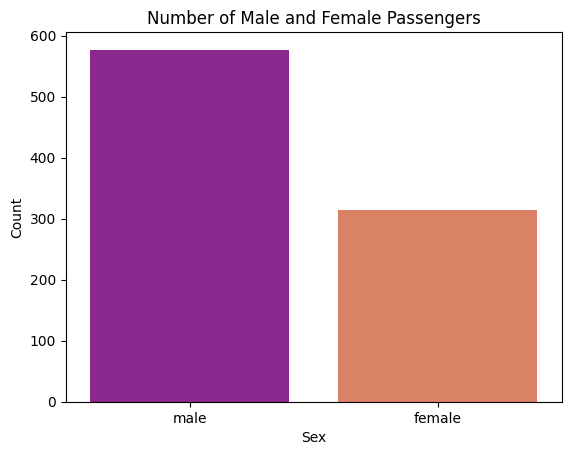

In [ ]:
sns.countplot(data=df, x='Sex', palette='plasma')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Male and Female Passengers')
plt.show()

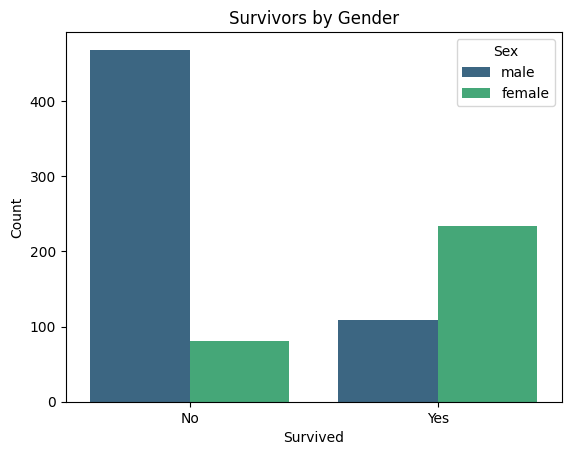

In [ ]:
sns.countplot(data=df, x='Survived', hue='Sex', palette='viridis')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Gender')
plt.show()

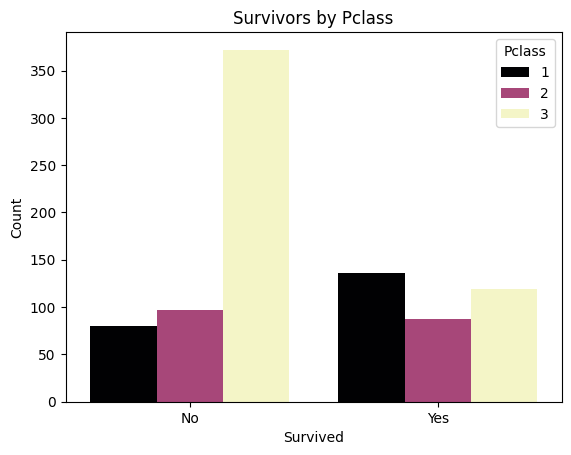

In [ ]:
sns.countplot(data=df, x='Survived', hue='Pclass', palette='magma')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Pclass')
plt.show()

<Axes: xlabel='Pclass'>

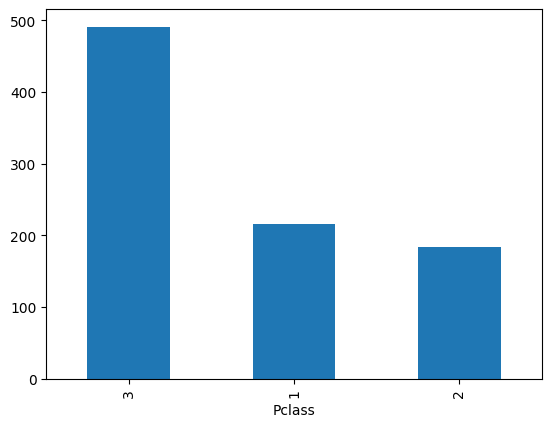

In [ ]:
pd.value_counts(df["Pclass"]).plot.bar()

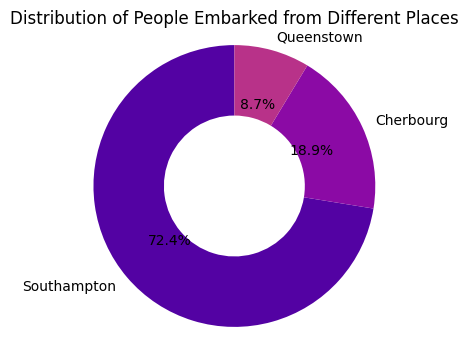

In [ ]:
embarked_counts = df['Embarked'].value_counts()
labels = ['Southampton', 'Cherbourg', 'Queenstown']  # City names
sizes = embarked_counts.values.tolist()
colors = sns.color_palette('plasma')
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.5))
plt.axis('equal')
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Distribution of People Embarked from Different Places')
plt.show()